In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [16]:
df_ampl = pd.read_csv(os.path.join("price_data", "ampl-usd-max.csv"))
df_bac = pd.read_csv(os.path.join("price_data", "bac-usd-max.csv"))
df_fei = pd.read_csv(os.path.join("price_data", "fei-usd-max.csv"))
df_frax = pd.read_csv(os.path.join("price_data", "frax-usd-max.csv"))
df_dsd = pd.read_csv(os.path.join("price_data", "dsd-usd-max.csv"))
df_dai = pd.read_csv(os.path.join("price_data", "dai-usd-max.csv"))
df_esd = pd.read_csv(os.path.join("price_data", "esd-usd-max.csv"))
df_rsv = pd.read_csv(os.path.join("price_data", "rsv-usd-max.csv"))
df_ust = pd.read_csv(os.path.join("price_data", "ust-usd-max.csv"))
dfs = {"AMPL":df_ampl, "BAC":df_bac, "FEI":df_fei, "FRAX":df_frax, "DSD":df_dsd, "DAI":df_dai, \
       "ESD":df_esd, "RSV":df_rsv, "UST":df_ust}

In [17]:
def deviation_from_peg(price, peg):
    return price-peg

In [18]:
def scale_deviation_from_peg(price, peg):
    if price > peg:
        #maps [peg, inf] to [0, peg]
        return peg * (price - peg) / (price)
    else:
        #returns value in [0, peg]
        return peg - price

In [19]:
def scale_deviation_from_peg_reverse(price, peg):
    if price < peg:
        return (peg**2)/(price) - peg
    else:
        return price - peg

In [20]:
def make_volatility_df(df, peg, vol_func):
    cols = ['week', 'std_dev']
    df_vol = pd.DataFrame(columns = cols)
    week_counter = 0
    week_price_list = []
    this_week = df['snapped_at'][0]
    for index, row in df.iterrows():
        if week_counter % 7 == 0:
            if (len(week_price_list) > 0):
                std_dev = np.sqrt(sum([np.power(vol_func(price, peg), 2) for price in week_price_list])/7)
                new_row = {'week':this_week, 'std_dev':std_dev}
                df_vol = df_vol.append(new_row, ignore_index = True)
            week_counter = 0
            week_price_list = []
            this_week = row['snapped_at']
        week_price_list.append(row['price'])
        week_counter += 1
    df_vol['week']= pd.to_datetime(df_vol['week'])
    return df_vol

In [21]:
def std_dev_from_peg(df, peg):
    return np.sqrt(sum([np.power(price-peg, 2) for price in df['price']])/len(df['price']))

In [22]:
def std_dev_from_peg_scaled(df, peg):
    return np.sqrt(sum([np.power(scale_deviation_from_peg(price, peg), 2) for price in df['price']])/len(df['price']))

In [23]:
def std_dev_from_peg_scaled_reverse(df, peg):
    return np.sqrt(sum([np.power(scale_deviation_from_peg_reverse(price, peg), 2) for price in df['price']])/len(df['price']))

In [24]:
vol_func = scale_deviation_from_peg
df_ampl_vol = make_volatility_df(df_ampl, 1, vol_func)
df_bac_vol = make_volatility_df(df_bac, 1, vol_func)
df_fei_vol = make_volatility_df(df_fei, 1, vol_func)
df_frax_vol = make_volatility_df(df_frax, 1, vol_func)
df_dsd_vol = make_volatility_df(df_dsd, 1, vol_func)
df_dai_vol = make_volatility_df(df_dai, 1, vol_func)
df_esd_vol = make_volatility_df(df_esd, 1, vol_func)
df_rsv_vol = make_volatility_df(df_rsv, 1, vol_func)
df_ust_vol = make_volatility_df(df_ust, 1, vol_func)
dfs_vol = {"AMPL":df_ampl_vol, "BAC":df_bac_vol, "FEI":df_fei_vol, "FRAX":df_frax_vol, "DSD":df_dsd_vol, "DAI":df_dai_vol, \
       "ESD":df_esd_vol, "RSV":df_rsv_vol, "UST":df_ust_vol}

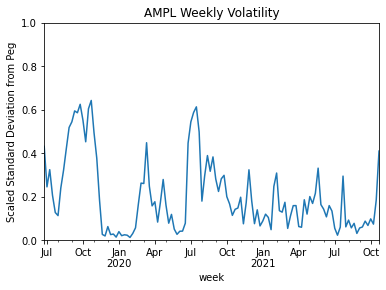

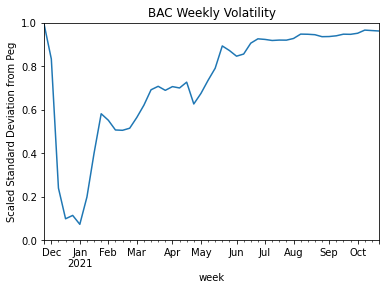

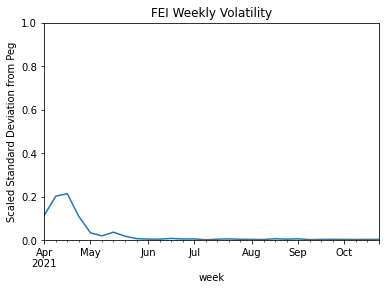

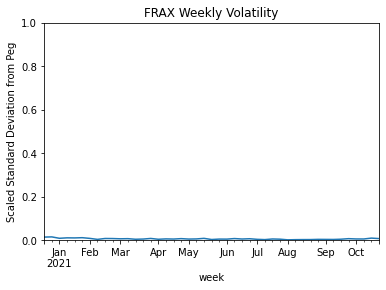

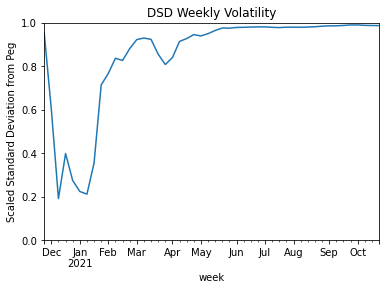

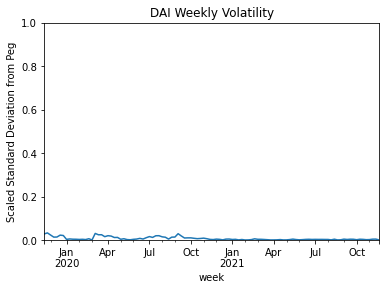

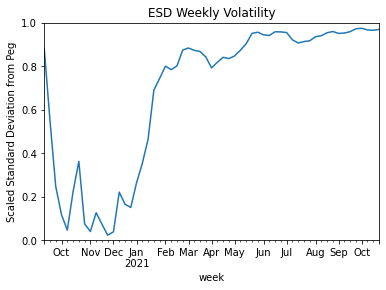

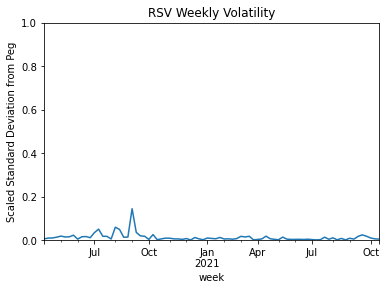

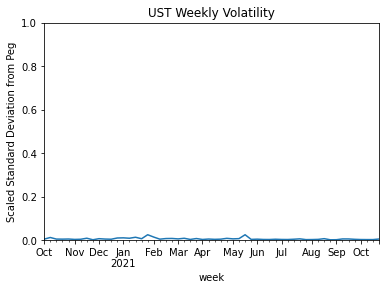

In [26]:
try: 
    os.mkdir("graphs")
except:
    pass
for df_vol in dfs_vol:
    vol_title = df_vol + str(" Weekly Volatility")
    file_name = df_vol + str("_vol.jpg")
    plt = dfs_vol[df_vol].plot(x='week', y='std_dev', ylabel='Scaled Standard Deviation from Peg', ylim=[0, 1], title=vol_title, legend=False)
    plt.figure.savefig(os.path.join("graphs", file_name), bbox_inches="tight")

In [13]:
for df in dfs:
    print(df, "Lifetime Volatility: ", std_dev_from_peg(dfs[df], 1))

AMPL Lifetime Volatility:  0.4050602871737134
BAC Lifetime Volatility:  36.33365385114665
FEI Lifetime Volatility:  0.06144887965972586
FRAX Lifetime Volatility:  0.0069543890485657435
DSD Lifetime Volatility:  5.466135794330091
DAI Lifetime Volatility:  0.011140044487727858
ESD Lifetime Volatility:  1.4881714180703491
RSV Lifetime Volatility:  0.02302310986877486
UST Lifetime Volatility:  0.007876873042977477


In [14]:
for df in dfs:
    print(df, "Lifetime Volatility: ", std_dev_from_peg_scaled(dfs[df], 1))

AMPL Lifetime Volatility:  0.26509701487879966
BAC Lifetime Volatility:  0.7761330911646491
FEI Lifetime Volatility:  0.061447761977439216
FRAX Lifetime Volatility:  0.00690237534934999
DSD Lifetime Volatility:  0.8808006426160504
DAI Lifetime Volatility:  0.010966511531124386
ESD Lifetime Volatility:  0.7648218942369537
RSV Lifetime Volatility:  0.022560125023532825
UST Lifetime Volatility:  0.007784128005676279


In [15]:
for df in dfs:
    print(df, " Lifetime Volatility: ", std_dev_from_peg_scaled_reverse(dfs[df], 1))

AMPL  Lifetime Volatility:  0.5701748492298321
BAC  Lifetime Volatility:  38.077926669070614
FEI  Lifetime Volatility:  0.07746611243743794
FRAX  Lifetime Volatility:  0.006993754638190305
DSD  Lifetime Volatility:  44.85044727774421
DAI  Lifetime Volatility:  0.011281835826879619
ESD  Lifetime Volatility:  14.966713863583184
RSV  Lifetime Volatility:  0.025878267811625916
UST  Lifetime Volatility:  0.007945538440034148
